In [1]:
import pandas as pd

df = pd.read_csv('Dataset/Student_performance_data _.csv')

df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [2]:
df.isnull().sum()


StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [3]:
df = df.drop("StudentID", axis=1)
df = df.drop("GPA", axis=1) #tolto perchè nella classificazione usiamo Grade Class che sono i valori interi di GPA
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0


# Bilanciamento dataset

Analisi dati precedentemente al bilanciamento

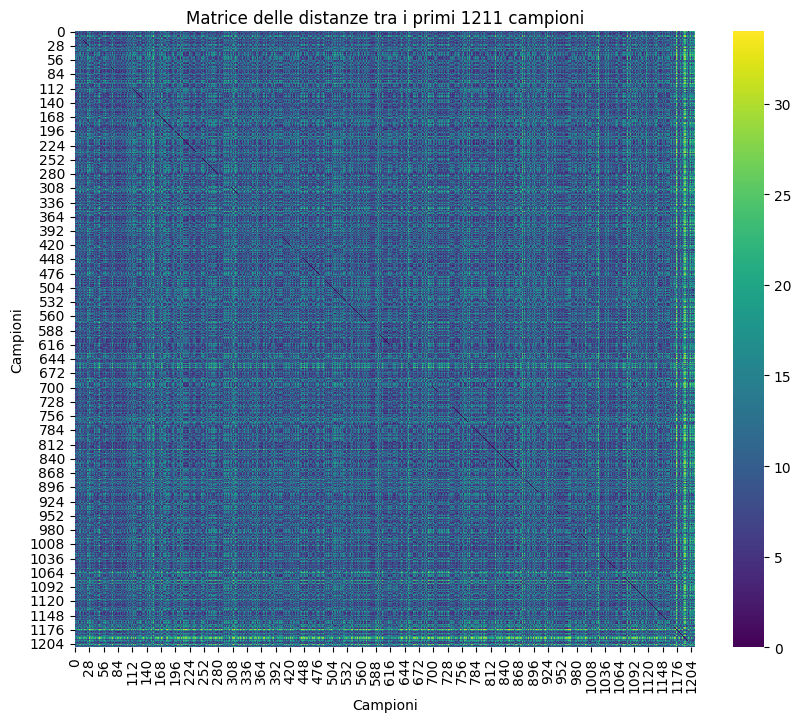

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split

# Funzione per visualizzare la matrice delle distanze come heatmap
def plot_distance_heatmap(X, n_samples=None):
    """
    Visualizza la matrice delle distanze tra i campioni come heatmap.

    Parameters:
    - X: dataframe con i dati dei campioni
    - n_samples: numero di campioni da considerare per la matrice delle distanze.
                 Se non specificato, verranno usati tutti i campioni.
    """
    # Se non viene fornito un valore per n_samples, usa tutti i campioni
    if n_samples is None:
        n_samples = len(X)
    
    # Se n_samples è maggiore del numero di campioni, usa tutti i campioni
    if n_samples > len(X):
        n_samples = len(X)
    
    # Seleziona i primi n_samples campioni
    X_subset = X.iloc[:n_samples]
    
    # Calcola la matrice delle distanze tra i campioni selezionati
    distances = pairwise_distances(X_subset)
    
    # Crea una heatmap della matrice delle distanze
    plt.figure(figsize=(10, 8))  # Imposta la dimensione della figura
    sns.heatmap(distances, cmap='viridis', annot=False, fmt='.2f', cbar=True)
    plt.title(f'Matrice delle distanze tra i primi {n_samples} campioni')
    plt.xlabel('Campioni')
    plt.ylabel('Campioni')
    plt.show()


# Supponiamo che la colonna 'GradeClass' sia la variabile target
y = df['GradeClass']
df1 = df.copy()

X = df1.drop('GradeClass', axis=1)

X_class = X[y == 4] 

plot_distance_heatmap(X_class, n_samples=2000)



La matrice sembra abbastanza densa, suggerendo che le distanze non sono né eccessivamente grandi né estremamente piccole in media. Questo significa che non abbiamo una distinzione particolarmente netta tra i dati. La diagonale è più scura perchè indica la distanza tra il campione e se stesso (quindi zero)

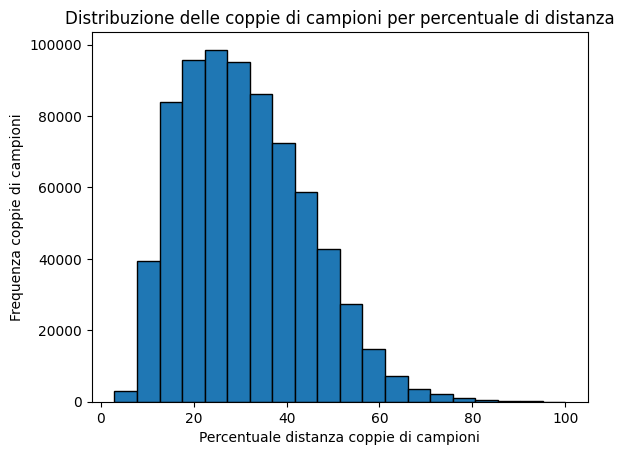

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

y = df['GradeClass']
df1 = df.copy()
X = df1.drop('GradeClass', axis=1)

def plot_similarity_distribution(X, bins=20):
    distances = pairwise_distances(X)
    
    # Estraggo solo la parte superiore triangolare della matrice (senza la diagonale)
    upper_triangular_distances = distances[np.triu_indices(len(X), k=1)]
    
    # Normalizza le distanze in percentuali rispetto alla massima distanza trovata
    max_distance = np.max(upper_triangular_distances)
    normalized_distances = (upper_triangular_distances / max_distance) * 100
    
    plt.hist(normalized_distances, bins=bins, edgecolor='black')
    plt.title('Distribuzione delle coppie di campioni per percentuale di distanza')
    plt.xlabel('Percentuale distanza coppie di campioni')
    plt.ylabel('Frequenza coppie di campioni')
    plt.show()

# Applica la funzione al dataset della classe di interesse (ad esempio, GradeClass 4)
X_class = X[y == 4] 
plot_similarity_distribution(X_class)



In [6]:
import numpy as np
from sklearn.metrics import pairwise_distances

# Funzione per calcolare e stampare il numero di coppie di campioni con distanza <= 10% della distanza massima
def count_similar_pairs(X, threshold_percentage=10):
    # Calcola la matrice delle distanze tra i campioni
    distances = pairwise_distances(X)
    
    # Estraggo la parte superiore triangolare della matrice (senza la diagonale)
    upper_triangular_distances = distances[np.triu_indices(len(X), k=1)]
    
    # Trova la distanza massima
    max_distance = np.max(upper_triangular_distances)
    
    # Calcola la soglia del 10% della distanza massima
    threshold = (threshold_percentage / 100) * max_distance
    
    # Conta il numero di coppie con distanza <= alla soglia
    similar_pairs_count = np.sum(upper_triangular_distances <= threshold)
    
    print(f"Numero di coppie di campioni con distanza <= {threshold_percentage}% della distanza massima: {similar_pairs_count}")


y = df['GradeClass']
df1 = df.copy()
X = df1.drop('GradeClass', axis=1)

X_class = X[y == 4] 
count_similar_pairs(X_class, threshold_percentage=5)


Numero di coppie di campioni con distanza <= 5% della distanza massima: 81


#### Prerazioni di Oversampling su classi 0,1,2,3 e Undersampling su classe 4

In [7]:
!pip install imblearn

Utilizzo SMOTE per oversampling, mentre per fare undersampling utilizzata tecnica basata su clusterizzazione. Alla fine tutti i campioni sono stati riportati a 500.

##### Risultati Oversampling:
    - Classe 0: 393 sintetici e 107 naturali
    - Classe 1: 232 sintetici e 268 naturali
    - Classe 2: 109 sintetici e 391 naturali
    - Classe 3: 86 sintetici e 414 naturali

##### Risultati Undersampling:
    - Classe 4: da 1211 campioni a 500 campioni, mediante clusterizzazione.

In [8]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Separazione delle feature e del target
X = df.drop('GradeClass', axis=1)
y = df['GradeClass']

# Suddivisione in train e test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applica SMOTE per aumentare le classi minoritarie nel set di training
smote = SMOTE(sampling_strategy={0: 500, 1: 500, 2: 500, 3: 500}, random_state=42)
X_sm, y_sm = smote.fit_resample(x_train, y_train)

# Applica ClusterCentroids per ridurre la classe maggioritaria nel set di training bilanciato
cluster_centroids = ClusterCentroids(sampling_strategy={4: 500}, random_state=42)
X_res, y_res = cluster_centroids.fit_resample(X_sm, y_sm)

# Combina X_res e y_res in un DataFrame per creare un nuovo DataFrame bilanciato di training
df_train_resampled = pd.DataFrame(X_res, columns=X.columns)  # Usa le stesse colonne di X
df_train_resampled['GradeClass'] = y_res  # Aggiunge la colonna target bilanciata

# Combina x_test e y_test in un DataFrame per creare il DataFrame di testing
df_test = pd.DataFrame(x_test, columns=X.columns)
df_test['GradeClass'] = y_test

# Salva i dati bilanciati di training e il set di testing in due file CSV separati
df_train_resampled.to_csv("Dataset/training_balanced.csv", index=False)
df_test.to_csv("Dataset/testing.csv", index=False)

print("Training set bilanciato:")
print(df_train_resampled.head())
print("\nTesting set:")
print(df_test.head())


c:\Users\gians_ji5genm\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Impossibile trovare il file specificato
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\gians_ji5genm\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\gians_ji5genm\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gians_ji5genm\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executa

Training set bilanciato:
   Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
0   15       0          0                  3         0.867944        10   
1   15       1          1                  2         5.463192         3   
2   16       0          0                  1        18.220314         0   
3   18       1          0                  2         7.724728         0   
4   18       0          2                  1        19.885760         2   

   Tutoring  ParentalSupport  Extracurricular  Sports  Music  Volunteering  \
0         1                2                0       0      0             0   
1         1                4                1       0      0             0   
2         0                4                0       0      0             0   
3         0                2                1       1      0             0   
4         0                3                1       0      0             0   

   GradeClass  
0         0.0  
1         0.0  
2      

C:\Users\gians_ji5genm\AppData\Local\Temp\ipykernel_4288\235361133.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_train_resampled, x='GradeClass', palette="Oranges")


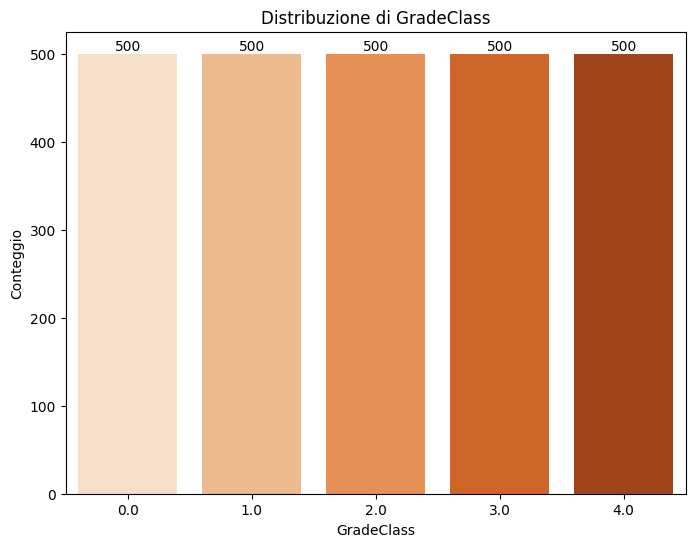

In [9]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_train_resampled, x='GradeClass', palette="Oranges")

df_train_resampled.to_csv("Dataset/dataset_resampled.csv", index=False)

# Annotazioni sui valori
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

plt.title('Distribuzione di GradeClass')
plt.xlabel('GradeClass')
plt.ylabel('Conteggio')
plt.show()


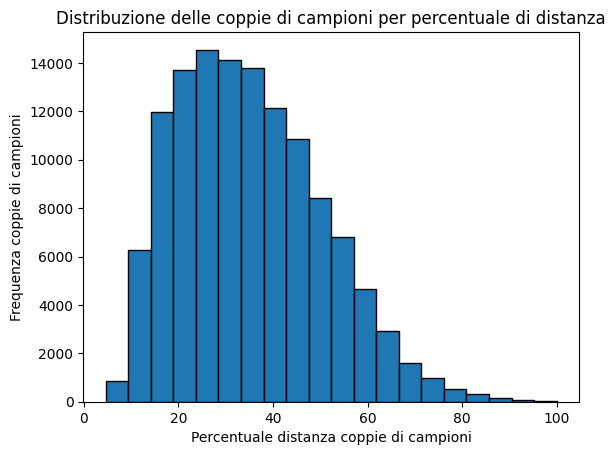

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

y = df_train_resampled['GradeClass']
df1 = df_train_resampled.copy()
X = df1.drop('GradeClass', axis=1)


X_class = X[y == 4]  
plot_similarity_distribution(X_class)



##### Matrice di correlazione sui dati nuovi

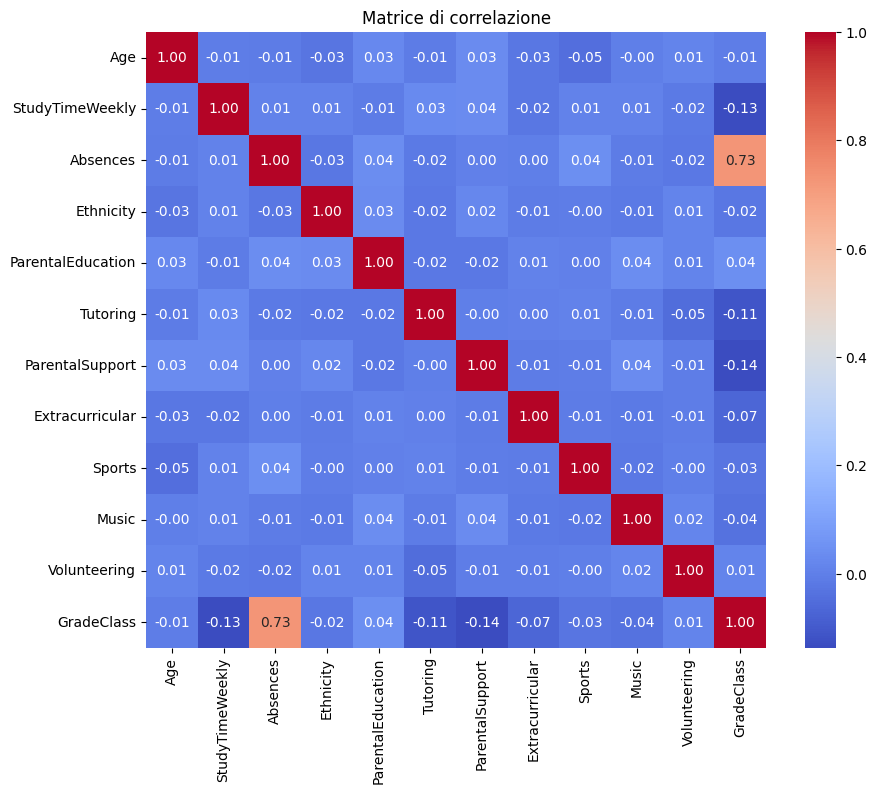

In [11]:
numerical_cols = ['Age', 'StudyTimeWeekly', 'Absences', 'Ethnicity','ParentalEducation', 'Tutoring', 'ParentalSupport',	'Extracurricular',	'Sports','Music','Volunteering','GradeClass']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice di correlazione')
plt.show()
